# Classifying movie reviews

In this example, we will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews. This is a "binary classification example".

## The Dataset

The IMDB dataset: a set of 50,000 reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

The IMDB dataset comes pre-built in Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

We load the dataset:

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

** Check training and test data dimension. **

In [3]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Prepare the Data

We cannot feed lists of integers into a neural network. We have to turn lists into tensors.

We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later).
We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.
We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

**Check one sample.**

In [8]:
# One sample
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
print(y_train.shape)
y_test = np.asarray(test_labels).astype('float32')

(25000,)


In [11]:
print('data type before:{}\ndata type after:{}'.format(train_labels.dtype, y_train.dtype))

data type before:int64
data type after:float32


## Building the Network

The input data is simply vectors, and the labels are scalars (1 and 0): this is the easiest setup you will ever encounter. 

*Key questions*: how many layers do we need? How many hidden units for each layer? 
We will build a simple stack of fully-connected (Dense) layers. The network should have the following structure:
- Dense layer with 16 hidden units and ReLU activation function;
- Dense layer with 16 hidden units and ReLU activation function;
- Dense layer output with sigmoid activation function;

*Remember*: for the fully connected layer, it holds: output = relu(dot(W, input) + b), with W weight matrix and b bias.

*Remember*: the sigmoid function will give you a score between 0 and 1, which tells you "how likely the sample is to have "1", that means the review to be "positive".

**Import models and layers from Keras.**

In [37]:
from keras import models
from keras import layers

**Create the network model as described above.**

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Loss: Binary Cross Entropy
For a binary classification like our task, we use a loss function called Binary Cross-Entropy (BCE).

$$BCE(y,\hat{y}) =- y \cdot log(\hat y ) - (1- y) \cdot log(1-\hat y) $$

where $y\in\mathbb{R}$ is the ground truth and $\hat y\in\mathbb{R}$ is the predicted probability of the review to be positive

Since the BCE function is a non-convex function, there is no closed-form solution for the optimal weights vector. In order to find the optimal parameters for our model, we need to use numeric methods such as Gradient Descent.

## Optimizer and Gradient Descent

The loss is a method of measuring how well our model fits the given data. The idea of the training process is to adjust iteratively the weights of our model in order to minimize the loss function. 

And this is where the optimizer comes in. In each training step, the optimizer updates the weights of the model w.r.t. the output of the loss function, thereby linking the loss function and model parameters together. The goal is to obtain a model which is accurately predicting the class for a new sample.


Any discussion about optimizers needs to begin with the most popular one, and it’s called Gradient Descent. This algorithm is used across all types of Machine Learning (and other math problems) to optimize. It’s fast, robust, and flexible. Here’s how it works:


0. Initialize the weights with random values.
1. Calculate loss with the current weights and the loss function.
2. Calculate the gradient of the loss function w.r.t. the weights.
3. Update weights with the corresponding gradient.
4. Iteratively perform Step 1 to 3 until converges.

The name of the optimizer already hints at the required concept: We use gradients which are very useful for minimizing a function. The gradient of the loss function w.r.t to the weights $w$ of our model tells us how to change our weights $w$ in order to minimize our loss function. 

The weights are updated each step as follows:
$$ w^{(n+1)} = w^{(n)} - \alpha \cdot \frac {dL}{dw}, $$
where $ \frac {dL}{dw}$ is the gradient of your loss function w.r.t. the weights $w$ and $\alpha$ is the learning rate which is a predefined positive scalar determining the size of the step.

There are also other popular optimizers that you can choose from, like RMSProp and Adam, which are in general good choices for neural networks. Here in the following, we are going to use RMSProp as our optimizer.

**Configure the model with an  optimizer and  a loss function. Check Keras documentation and try to understand which one suits better for your problem.** (`rmsprop`,`binary_crossentropy`)

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Do the same as in the previous cell but pass an optimizer class instance as the optimizer argument. Check Keras [documentation](https://keras.io/api/optimizers/sgd/) for more insights.**

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Do the same as in the previous cell, but pass function objects as the loss or metrics arguments.**

In [18]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating the approach

**Create the Validation set of 10,000 samples out of the training data set.**

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train the model for 20 epochs in mini-batches of 512 samples. Use the Validation set you have just created. Check Keras [documentation](https://keras.io/api/models/model_training_apis/) for more info. You could split the data yourself and use *validation_data*, or simply use the *validation_split* argument**

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
28/30 [===========================>..] - ETA: 0s - loss: 0.5210 - binary_accuracy: 0.7772WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x14f093440> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

** Check the `.history` of the result of your fit and print it to see in which format it is and how it is possible to access to the values. **

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

** Complete the #TO DO to obtain the plot of the training and validation accuracy. **

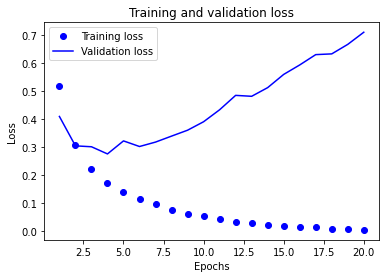

In [22]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy'] #TO DO: take from the history dictionary of the model the training accuracy
val_acc = history.history['val_binary_accuracy'] #TO DO: take from the history dictionary of the model the validation accuracy
loss = history.history['loss'] #TO DO: take from the history dictionary of the model the training loss
val_loss = history.history['val_loss'] #TO DO: take from the history dictionary of the model the validation loss 

epochs = range(1, len(acc) + 1)

# Plot the Loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss') #TO DO: use the training loss
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss') #TO DO: use validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

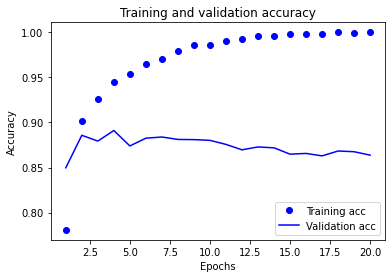

In [23]:
# Plot the Accuracy

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy'] #TO DO: take from the history dictionary of the model the training accuracy
val_acc_values = history_dict['val_binary_accuracy'] # TO DO: take from the history dictionary of the model the validation accuracy

# Plot Epochs vs Training accuracy and Epochs vs Validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc') #TO DO: use training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation acc')#TO DO: use validation accuracy
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**What can you conclude from these results? Try to analyse and understand them.**

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.
In this case, to prevent overfitting, we could simply stop training after three epochs.

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

**Train a new network from scratch for 4 epochs and evaluate it on the test data.**

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
49/49 [==============================] - 3s 36ms/step - loss: 0.4864 - accuracy: 0.7988
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2728 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2067 - accuracy: 0.9278
Epoch 4/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1713 - acc

In [25]:
results

[0.2979873716831207, 0.8819199800491333]

## Test the Network

**Make predictions with your model.**

In [26]:
model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.17589027],
       [0.99996674],
       [0.8519112 ],
       ...,
       [0.15770543],
       [0.07929331],
       [0.5958747 ]], dtype=float32)

## Further experiments

**NOTE: In the next Lab, we will focus more in optimizing the hyperparameters and understanding how they may influence the outcomes. However here are some simple experiments you can also try now.**

**Try out these experiments and every time re-compute the accuracy to check how it changes.**
#### Experiment 1
We were using 2 hidden layers, try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
#### Experiment 2
Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
#### Experiment 3
Try to use the another loss function.
#### Experiment 4
Try to use the tanh activation instead of ReLU.




## Conclusions
Here's what you should take away from this example:

- There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you will likely use them frequently.
- In a binary classification problem (two output classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is binary_crossentropy.
- The RMSprop optimizer is generally a good enough choice of optimizer, whatever your problem.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.